# Questions

# What are columns:
- ClientId
- Row
- Seat (unique?)
- Serial = Tickenumber
- Mode
- NewSection
- OldSection
- Result
- ScannerId
- Section
- PackageID
- ServerId

# ?

In [1]:
import pandas as pd
import os
import numpy as np

In [2]:
%matplotlib notebook

In [3]:
current_dir = os.getcwd()

In [4]:
etix_tickets_path = current_dir + "/etix_tickets/"

In [5]:
# load all csv files into dataframe

In [6]:
df_etix = pd.DataFrame()
count = 0
for file in os.listdir(etix_tickets_path):
    if file.split(".")[-1] == 'csv':
        count +=1
        df_tmp = pd.read_csv(etix_tickets_path + file)
        df_tmp['gameid'] = count
        df_etix = pd.concat([df_etix, df_tmp])
df_etix.Date = pd.to_datetime(df_etix.Date, format="%m/%d/%Y %H:%M:%S")

In [7]:
df_tmp.columns

Index(['ClientId', 'Serial', 'Date', 'Mode', 'NewSection', 'OldSection',
       'Result', 'ScannerId', 'Section', 'Row', 'Seat', 'Pricecode',
       'PerformanceId', 'PackageId', 'ServerId', 'gameid'],
      dtype='object')

In [8]:
df_etix.index = df_etix.Date
df_etix.drop("Date", axis = 1, inplace = True)
df_etix.Row = df_etix.Row.astype(str)
df_etix.replace(" ", 0 , inplace = True)
df_etix.Row = df_etix.Row.astype(np.int16)
df_etix.Seat = df_etix.Seat.astype(str)
df_etix.Seat= df_etix.Seat.astype(np.int16)

In [9]:
# possible scanner results

In [10]:
df_etix.Result = df_etix.Result.replace("VALID", 1).replace("EXIT", -1).replace("REENTERED", 1).replace("ALREADY", 0).replace("NOTIN", 0).replace("ALREADYOUT", 0)

In [11]:
df_etix

,ClientId,Serial,Mode,NewSection,OldSection,Result,ScannerId,Section,Row,Seat,Pricecode,PerformanceId,PackageId,ServerId,gameid
Date,,,,,,,,,,,,,,,
2021-08-14 12:34:38,16,100051312903,1,AK,outside,1,84,AK;G;M;ST;TV;IR;MANN;ORG;H;MED;VIP;A;E4;,0,0,999-(AK) Saison 2021/22,999999999,-1,9370,1
2021-08-14 12:34:59,16,100050992355,1,AK,outside,1,23,AK;G;M;ST;TV;IR;MANN;ORG;H;MED;VIP;A;E4;,0,0,999-(AK) Saison 2021/22,999999999,-1,9370,1
2021-08-14 12:43:47,16,100051070833,1,AK,outside,1,23,AK;G;M;ST;TV;IR;MANN;ORG;H;MED;VIP;A;E4;,0,0,999-(AK) Saison 2021/22,999999999,-1,9370,1
2021-08-14 12:48:09,16,100051065932,1,AK,outside,1,23,AK;G;M;ST;TV;IR;MANN;ORG;H;MED;VIP;A;E4;,0,0,999-(AK) Saison 2021/22,999999999,-1,9370,1
2021-08-14 12:48:49,16,100051065932,2,outside,AK,-1,23,AK;G;M;ST;TV;IR;MANN;ORG;H;MED;VIP;A;E4;,0,0,999-(AK) Saison 2021/22,999999999,-1,9370,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-31 14:09:41,13,4945166874,1,Lene,outside,1,97,C1 Nichtraucher,4,15,Erwachsen,3039412,-1,6300,40
2019-08-31 14:09:43,13,4945166880,1,Lene,outside,1,97,C1 Nichtraucher,4,16,Kind,3039412,-1,6300,40
2019-08-31 14:09:45,13,4945166891,1,Lene,outside,1,97,C1 Nichtraucher,4,17,Kind,3039412,-1,6300,40


In [12]:
df_etix.loc[df_etix.index.weekday >4]

,ClientId,Serial,Mode,NewSection,OldSection,Result,ScannerId,Section,Row,Seat,Pricecode,PerformanceId,PackageId,ServerId,gameid
Date,,,,,,,,,,,,,,,
2021-08-14 12:34:38,16,100051312903,1,AK,outside,1,84,AK;G;M;ST;TV;IR;MANN;ORG;H;MED;VIP;A;E4;,0,0,999-(AK) Saison 2021/22,999999999,-1,9370,1
2021-08-14 12:34:59,16,100050992355,1,AK,outside,1,23,AK;G;M;ST;TV;IR;MANN;ORG;H;MED;VIP;A;E4;,0,0,999-(AK) Saison 2021/22,999999999,-1,9370,1
2021-08-14 12:43:47,16,100051070833,1,AK,outside,1,23,AK;G;M;ST;TV;IR;MANN;ORG;H;MED;VIP;A;E4;,0,0,999-(AK) Saison 2021/22,999999999,-1,9370,1
2021-08-14 12:48:09,16,100051065932,1,AK,outside,1,23,AK;G;M;ST;TV;IR;MANN;ORG;H;MED;VIP;A;E4;,0,0,999-(AK) Saison 2021/22,999999999,-1,9370,1
2021-08-14 12:48:49,16,100051065932,2,outside,AK,-1,23,AK;G;M;ST;TV;IR;MANN;ORG;H;MED;VIP;A;E4;,0,0,999-(AK) Saison 2021/22,999999999,-1,9370,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-31 14:09:41,13,4945166874,1,Lene,outside,1,97,C1 Nichtraucher,4,15,Erwachsen,3039412,-1,6300,40
2019-08-31 14:09:43,13,4945166880,1,Lene,outside,1,97,C1 Nichtraucher,4,16,Kind,3039412,-1,6300,40
2019-08-31 14:09:45,13,4945166891,1,Lene,outside,1,97,C1 Nichtraucher,4,17,Kind,3039412,-1,6300,40


In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\ankit\miniconda3\envs\smartpm\lib\site-packages\pandas\plotting\_matplotlib\core.py:1200: UserWarning: Attempting to set identical left == right == 26161610.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)
C:\Users\ankit\miniconda3\envs\smartpm\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


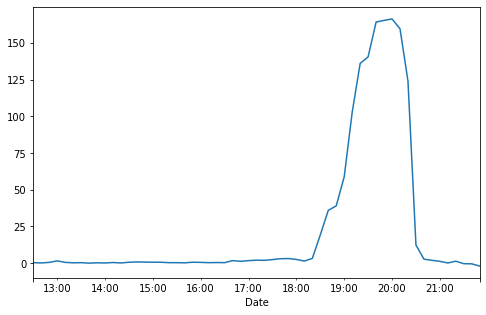

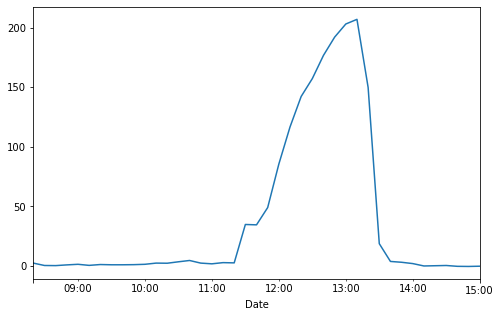

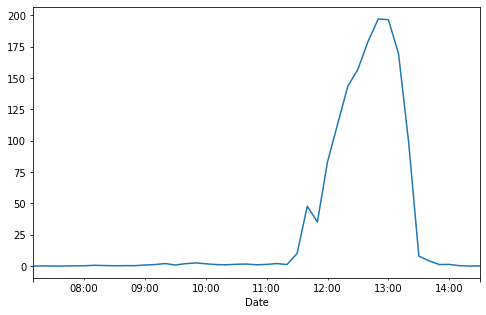

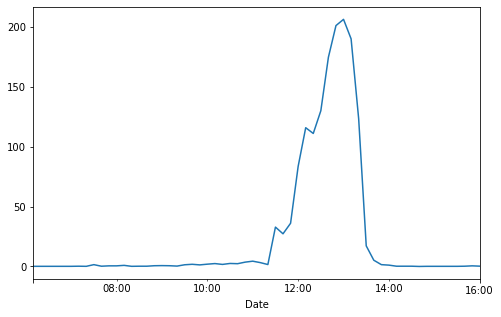

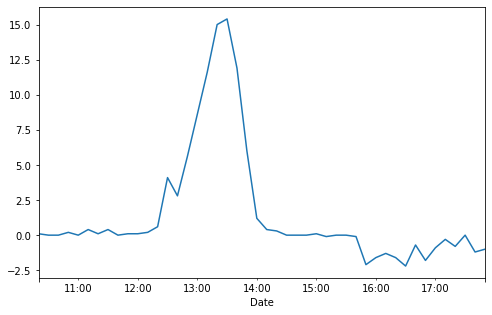

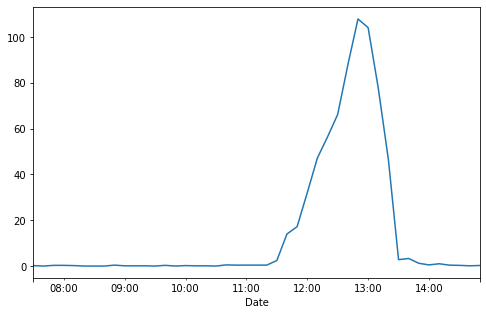

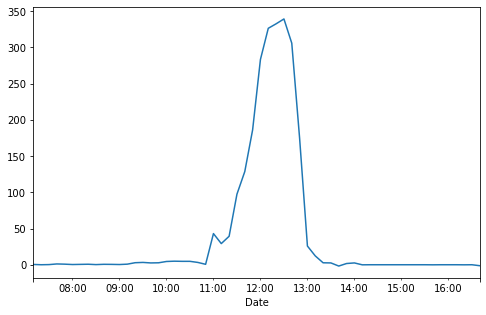

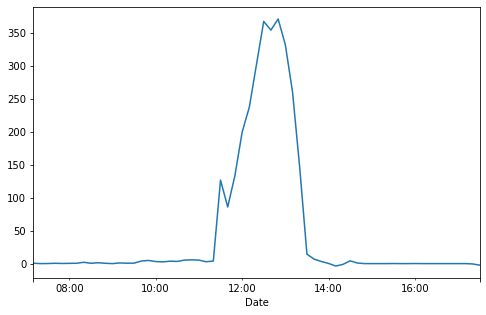

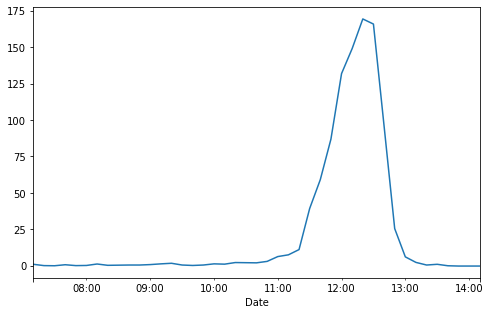

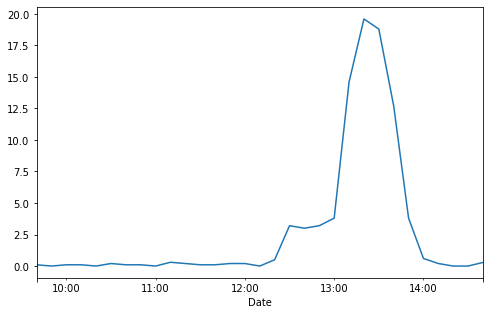

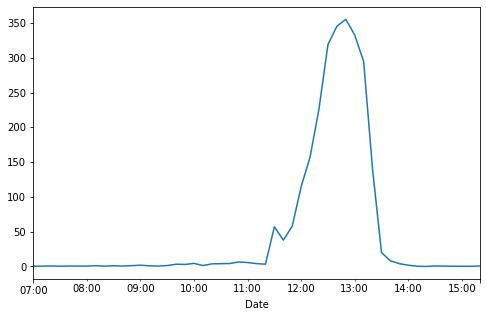

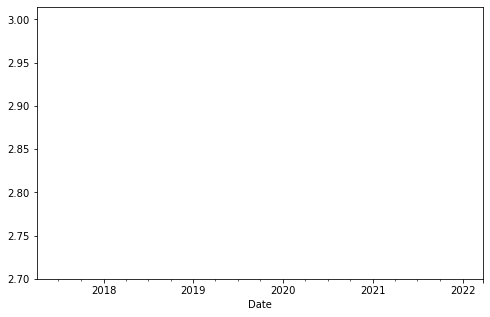

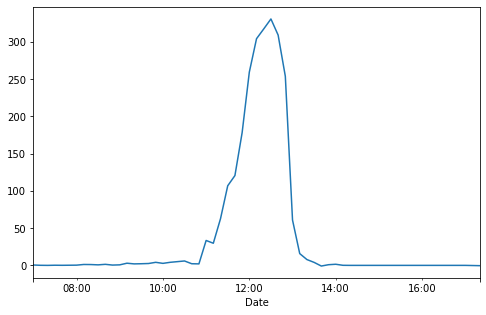

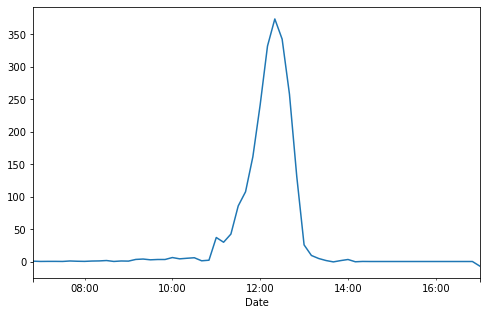

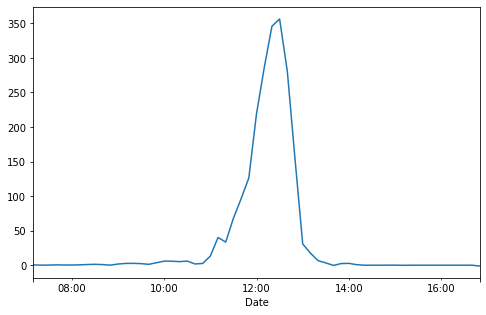

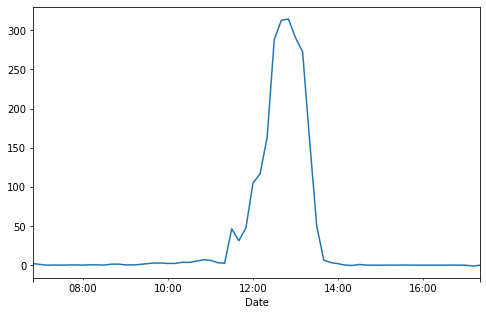

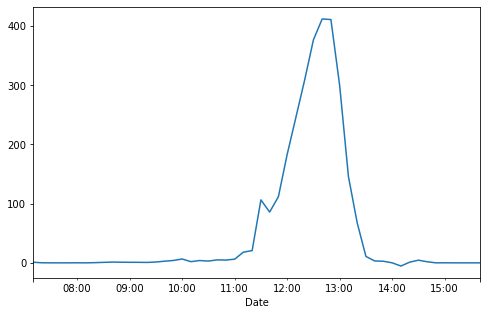

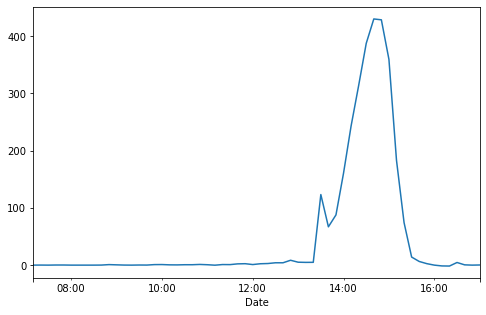

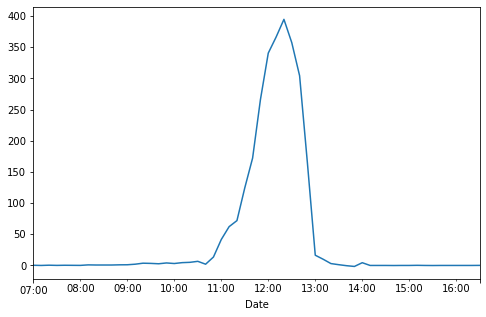

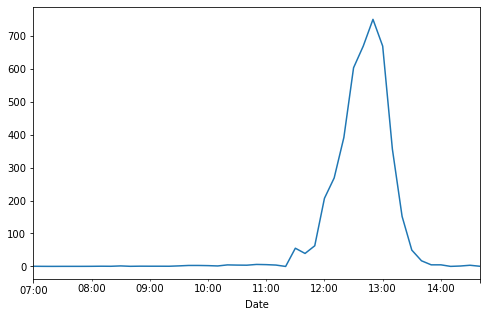

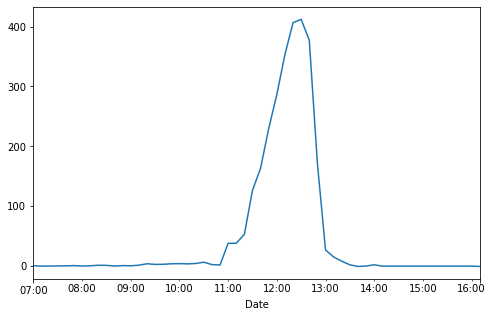

In [14]:
selection = df_etix.loc[df_etix.index.weekday >4]
for gid in selection.gameid.unique():
    plt.figure(figsize=(8,5))
    test = df_etix.loc[df_etix.gameid == gid]
    test.Result.resample('60s').sum().resample('10min').mean().plot()

In [15]:
test = df_etix.loc[df_etix.gameid == 10]

<AxesSubplot:xlabel='Date'>

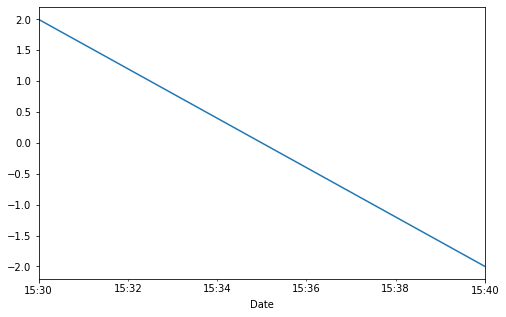

In [16]:
plt.figure(figsize=(8,5))
#test.Result.resample('30s').sum().plot()
test.Result.resample('60s').sum().resample('10min').mean().plot()

<AxesSubplot:xlabel='Date'>

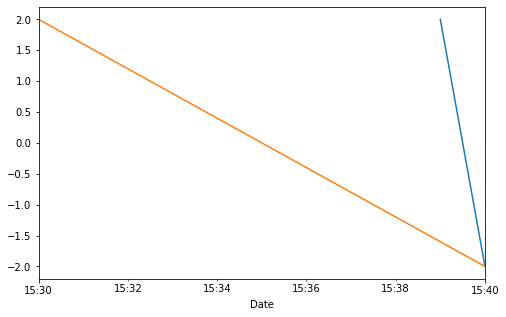

In [17]:
plt.figure(figsize=(8,5))
test.Result.resample('60s').sum().plot()
test.Result.resample('60s').sum().resample('10min').mean().plot()

In [18]:
from datetime import datetime, timedelta

In [19]:
def shift_timestamps(df, hours = 8):
    selection = df_etix.loc[df_etix.index.weekday >4]
    test = []
    new_dataframe = pd.DataFrame(columns= df.columns)
    for gid in selection.gameid.unique():
        test = df_etix.loc[df_etix.gameid == gid]
        shift = test.Result.resample('60s').sum().resample('10min').agg(["max"])
        max_timestamp = shift.idxmax(axis =0)[0].to_pydatetime()
        max_delta  = max_timestamp-timedelta(hours = hours)
        data = df.reset_index()
        data = data[data.gameid == gid]
        max_time_substract = max_delta.strftime("%H:%M:%S")
        #print(int(max_delta.strftime("%H")))
        #print(int(max_delta.strftime("%M")))
        #asd
        #print(max_time_substract)
        #asda
        #print(data.dtypes)
        
#    "        #data[\"Date\"]=list(map(lambda x: datetime.fromtimestamp(x), data[\"Date\"]))\n",
        #data["Date"]=list(map(lambda x: print(f"{type(x)}x :{x}"), data["Date"]))
        #asdas
#    "        #data[\"Date\"]=data[\"Date\"].to_pydatetime()\n",
        #print(data["Date"] + timedelta(hours=int(max_delta.strftime("%H")),minutes = int(max_delta.strftime("%M")), seconds = int(max_delta.strftime("%S"))) )
        data["Shifted_time_stamp"] = data["Date"] - timedelta(hours=int(max_delta.strftime("%H")),minutes = int(max_delta.strftime("%M")), seconds = int(max_delta.strftime("%S")))
        new_dataframe= pd.concat([new_dataframe, data], axis=0)
    
    return new_dataframe

In [20]:
df_etix

,ClientId,Serial,Mode,NewSection,OldSection,Result,ScannerId,Section,Row,Seat,Pricecode,PerformanceId,PackageId,ServerId,gameid
Date,,,,,,,,,,,,,,,
2021-08-14 12:34:38,16,100051312903,1,AK,outside,1,84,AK;G;M;ST;TV;IR;MANN;ORG;H;MED;VIP;A;E4;,0,0,999-(AK) Saison 2021/22,999999999,-1,9370,1
2021-08-14 12:34:59,16,100050992355,1,AK,outside,1,23,AK;G;M;ST;TV;IR;MANN;ORG;H;MED;VIP;A;E4;,0,0,999-(AK) Saison 2021/22,999999999,-1,9370,1
2021-08-14 12:43:47,16,100051070833,1,AK,outside,1,23,AK;G;M;ST;TV;IR;MANN;ORG;H;MED;VIP;A;E4;,0,0,999-(AK) Saison 2021/22,999999999,-1,9370,1
2021-08-14 12:48:09,16,100051065932,1,AK,outside,1,23,AK;G;M;ST;TV;IR;MANN;ORG;H;MED;VIP;A;E4;,0,0,999-(AK) Saison 2021/22,999999999,-1,9370,1
2021-08-14 12:48:49,16,100051065932,2,outside,AK,-1,23,AK;G;M;ST;TV;IR;MANN;ORG;H;MED;VIP;A;E4;,0,0,999-(AK) Saison 2021/22,999999999,-1,9370,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-31 14:09:41,13,4945166874,1,Lene,outside,1,97,C1 Nichtraucher,4,15,Erwachsen,3039412,-1,6300,40
2019-08-31 14:09:43,13,4945166880,1,Lene,outside,1,97,C1 Nichtraucher,4,16,Kind,3039412,-1,6300,40
2019-08-31 14:09:45,13,4945166891,1,Lene,outside,1,97,C1 Nichtraucher,4,17,Kind,3039412,-1,6300,40


In [21]:
df_etix_with_shifted_timestamps = shift_timestamps(df_etix)

In [22]:
df_etix_with_shifted_timestamps

,ClientId,Serial,Mode,NewSection,OldSection,Result,ScannerId,Section,Row,Seat,Pricecode,PerformanceId,PackageId,ServerId,gameid,Date,Shifted_time_stamp
0,16,100051312903,1,AK,outside,1,84,AK;G;M;ST;TV;IR;MANN;ORG;H;MED;VIP;A;E4;,0,0,999-(AK) Saison 2021/22,999999999,-1,9370,1,2021-08-14 12:34:38,2021-08-14 00:14:38
1,16,100050992355,1,AK,outside,1,23,AK;G;M;ST;TV;IR;MANN;ORG;H;MED;VIP;A;E4;,0,0,999-(AK) Saison 2021/22,999999999,-1,9370,1,2021-08-14 12:34:59,2021-08-14 00:14:59
2,16,100051070833,1,AK,outside,1,23,AK;G;M;ST;TV;IR;MANN;ORG;H;MED;VIP;A;E4;,0,0,999-(AK) Saison 2021/22,999999999,-1,9370,1,2021-08-14 12:43:47,2021-08-14 00:23:47
3,16,100051065932,1,AK,outside,1,23,AK;G;M;ST;TV;IR;MANN;ORG;H;MED;VIP;A;E4;,0,0,999-(AK) Saison 2021/22,999999999,-1,9370,1,2021-08-14 12:48:09,2021-08-14 00:28:09
4,16,100051065932,2,outside,AK,-1,23,AK;G;M;ST;TV;IR;MANN;ORG;H;MED;VIP;A;E4;,0,0,999-(AK) Saison 2021/22,999999999,-1,9370,1,2021-08-14 12:48:49,2021-08-14 00:28:49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575709,13,4945166874,1,Lene,outside,1,97,C1 Nichtraucher,4,15,Erwachsen,3039412,-1,6300,40,2019-08-31 14:09:41,2019-08-31 09:49:41
575710,13,4945166880,1,Lene,outside,1,97,C1 Nichtraucher,4,16,Kind,3039412,-1,6300,40,2019-08-31 14:09:43,2019-08-31 09:49:43
575711,13,4945166891,1,Lene,outside,1,97,C1 Nichtraucher,4,17,Kind,3039412,-1,6300,40,2019-08-31 14:09:45,2019-08-31 09:49:45
575712,15,100032824383,1,VIP,VIP,0,B117,AK;M;MT;P;VzP;,0,0,999-(AK) FC St. Pauli,999999999,-1,6300,40,2019-08-31 15:21:48,2019-08-31 11:01:48


In [23]:
ex_timestamp = df_etix_with_shifted_timestamps.iloc[0].Shifted_time_stamp

In [24]:
ex_timestamp

Timestamp('2021-08-14 00:14:38')

In [25]:
df_etix_with_shifted_timestamps["H_M_S_shifted"]=list(map(lambda x: datetime.strftime(x, "%H:%M:%S"), df_etix_with_shifted_timestamps.Shifted_time_stamp))
df_etix_with_shifted_timestamps["y_m_d"]=list(map(lambda x: datetime.strftime(x, "%Y-%m-%d"), df_etix_with_shifted_timestamps.Date))

In [26]:
#df_etix_with_shifted_timestamps.reset_index(inplace = True)
#df_etix_with_shifted_timestamps["weather"] = df_etix_with_shifted_timestamps["OldSection"]
#for i in range(0, len(df_etix_with_shifted_timestamps)):
#    df_etix_with_shifted_timestamps["weather"][i] = weather_date_dict[df_etix_with_shifted_timestamps["y_m_d"][i]]


In [27]:
df_etix_with_shifted_timestamps

,ClientId,Serial,Mode,NewSection,OldSection,Result,ScannerId,Section,Row,Seat,Pricecode,PerformanceId,PackageId,ServerId,gameid,Date,Shifted_time_stamp,H_M_S_shifted,y_m_d
0,16,100051312903,1,AK,outside,1,84,AK;G;M;ST;TV;IR;MANN;ORG;H;MED;VIP;A;E4;,0,0,999-(AK) Saison 2021/22,999999999,-1,9370,1,2021-08-14 12:34:38,2021-08-14 00:14:38,00:14:38,2021-08-14
1,16,100050992355,1,AK,outside,1,23,AK;G;M;ST;TV;IR;MANN;ORG;H;MED;VIP;A;E4;,0,0,999-(AK) Saison 2021/22,999999999,-1,9370,1,2021-08-14 12:34:59,2021-08-14 00:14:59,00:14:59,2021-08-14
2,16,100051070833,1,AK,outside,1,23,AK;G;M;ST;TV;IR;MANN;ORG;H;MED;VIP;A;E4;,0,0,999-(AK) Saison 2021/22,999999999,-1,9370,1,2021-08-14 12:43:47,2021-08-14 00:23:47,00:23:47,2021-08-14
3,16,100051065932,1,AK,outside,1,23,AK;G;M;ST;TV;IR;MANN;ORG;H;MED;VIP;A;E4;,0,0,999-(AK) Saison 2021/22,999999999,-1,9370,1,2021-08-14 12:48:09,2021-08-14 00:28:09,00:28:09,2021-08-14
4,16,100051065932,2,outside,AK,-1,23,AK;G;M;ST;TV;IR;MANN;ORG;H;MED;VIP;A;E4;,0,0,999-(AK) Saison 2021/22,999999999,-1,9370,1,2021-08-14 12:48:49,2021-08-14 00:28:49,00:28:49,2021-08-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575709,13,4945166874,1,Lene,outside,1,97,C1 Nichtraucher,4,15,Erwachsen,3039412,-1,6300,40,2019-08-31 14:09:41,2019-08-31 09:49:41,09:49:41,2019-08-31
575710,13,4945166880,1,Lene,outside,1,97,C1 Nichtraucher,4,16,Kind,3039412,-1,6300,40,2019-08-31 14:09:43,2019-08-31 09:49:43,09:49:43,2019-08-31
575711,13,4945166891,1,Lene,outside,1,97,C1 Nichtraucher,4,17,Kind,3039412,-1,6300,40,2019-08-31 14:09:45,2019-08-31 09:49:45,09:49:45,2019-08-31
575712,15,100032824383,1,VIP,VIP,0,B117,AK;M;MT;P;VzP;,0,0,999-(AK) FC St. Pauli,999999999,-1,6300,40,2019-08-31 15:21:48,2019-08-31 11:01:48,11:01:48,2019-08-31


In [28]:
weather_date_dict = {'2019-11-13': 'rain',
 '2019-12-08': 'dry',
 '2020-10-10': 'dry',
 '2019-09-11': 'dry',
 '2019-10-08': 'rain',
 '2020-02-04': 'rain',
 '2021-09-26': 'dry',
 '2019-10-26': 'dry',
 '2019-09-28': 'dry',
 '2020-08-13': 'dry',
 '2021-08-29': 'dry',
 '2019-09-22': 'dry',
 '2019-11-30': 'dry',
 '2020-02-07': 'rain',
 '2020-03-08': 'dry',
 '2019-11-14': 'dry',
 '2019-09-25': 'dry',
 '2020-10-31': 'rain',
 '2019-05-19': 'dry',
 '2020-01-30': 'dry',
 '2021-10-17': 'dry',
 '2021-07-24': 'dry',
 '2020-09-27': 'dry',
 '2019-11-08': 'dry',
 '2019-08-18': 'dry',
 '2019-07-27': 'dry',
 '2021-07-19': 'dry',
 '2020-10-20': 'dry',
 '2019-08-31': 'dry',
 '2019-05-03': 'dry',
 '2020-09-14': 'dry',
 '2020-01-29': 'dry',
 '2019-10-05': 'rain',
 '2019-01-30': 'dry',
 '2021-07-21': 'dry',
 '2019-07-16': 'dry',
 '2019-04-21': 'dry',
 '2020-02-22': 'dry',
 '2021-08-14': 'dry',
 '2021-08-06': 'dry'}

In [29]:
list_temp = []
list_temp = [weather_date_dict.get(d) for d in df_etix_with_shifted_timestamps["y_m_d"]]
df_etix_with_shifted_timestamps["weather"] = list_temp

In [30]:
df_etix_with_shifted_timestamps

,ClientId,Serial,Mode,NewSection,OldSection,Result,ScannerId,Section,Row,Seat,Pricecode,PerformanceId,PackageId,ServerId,gameid,Date,Shifted_time_stamp,H_M_S_shifted,y_m_d,weather
0,16,100051312903,1,AK,outside,1,84,AK;G;M;ST;TV;IR;MANN;ORG;H;MED;VIP;A;E4;,0,0,999-(AK) Saison 2021/22,999999999,-1,9370,1,2021-08-14 12:34:38,2021-08-14 00:14:38,00:14:38,2021-08-14,dry
1,16,100050992355,1,AK,outside,1,23,AK;G;M;ST;TV;IR;MANN;ORG;H;MED;VIP;A;E4;,0,0,999-(AK) Saison 2021/22,999999999,-1,9370,1,2021-08-14 12:34:59,2021-08-14 00:14:59,00:14:59,2021-08-14,dry
2,16,100051070833,1,AK,outside,1,23,AK;G;M;ST;TV;IR;MANN;ORG;H;MED;VIP;A;E4;,0,0,999-(AK) Saison 2021/22,999999999,-1,9370,1,2021-08-14 12:43:47,2021-08-14 00:23:47,00:23:47,2021-08-14,dry
3,16,100051065932,1,AK,outside,1,23,AK;G;M;ST;TV;IR;MANN;ORG;H;MED;VIP;A;E4;,0,0,999-(AK) Saison 2021/22,999999999,-1,9370,1,2021-08-14 12:48:09,2021-08-14 00:28:09,00:28:09,2021-08-14,dry
4,16,100051065932,2,outside,AK,-1,23,AK;G;M;ST;TV;IR;MANN;ORG;H;MED;VIP;A;E4;,0,0,999-(AK) Saison 2021/22,999999999,-1,9370,1,2021-08-14 12:48:49,2021-08-14 00:28:49,00:28:49,2021-08-14,dry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575709,13,4945166874,1,Lene,outside,1,97,C1 Nichtraucher,4,15,Erwachsen,3039412,-1,6300,40,2019-08-31 14:09:41,2019-08-31 09:49:41,09:49:41,2019-08-31,dry
575710,13,4945166880,1,Lene,outside,1,97,C1 Nichtraucher,4,16,Kind,3039412,-1,6300,40,2019-08-31 14:09:43,2019-08-31 09:49:43,09:49:43,2019-08-31,dry
575711,13,4945166891,1,Lene,outside,1,97,C1 Nichtraucher,4,17,Kind,3039412,-1,6300,40,2019-08-31 14:09:45,2019-08-31 09:49:45,09:49:45,2019-08-31,dry
575712,15,100032824383,1,VIP,VIP,0,B117,AK;M;MT;P;VzP;,0,0,999-(AK) FC St. Pauli,999999999,-1,6300,40,2019-08-31 15:21:48,2019-08-31 11:01:48,11:01:48,2019-08-31,dry


In [31]:
df_etix_with_shifted_timestamps

,ClientId,Serial,Mode,NewSection,OldSection,Result,ScannerId,Section,Row,Seat,Pricecode,PerformanceId,PackageId,ServerId,gameid,Date,Shifted_time_stamp,H_M_S_shifted,y_m_d,weather
0,16,100051312903,1,AK,outside,1,84,AK;G;M;ST;TV;IR;MANN;ORG;H;MED;VIP;A;E4;,0,0,999-(AK) Saison 2021/22,999999999,-1,9370,1,2021-08-14 12:34:38,2021-08-14 00:14:38,00:14:38,2021-08-14,dry
1,16,100050992355,1,AK,outside,1,23,AK;G;M;ST;TV;IR;MANN;ORG;H;MED;VIP;A;E4;,0,0,999-(AK) Saison 2021/22,999999999,-1,9370,1,2021-08-14 12:34:59,2021-08-14 00:14:59,00:14:59,2021-08-14,dry
2,16,100051070833,1,AK,outside,1,23,AK;G;M;ST;TV;IR;MANN;ORG;H;MED;VIP;A;E4;,0,0,999-(AK) Saison 2021/22,999999999,-1,9370,1,2021-08-14 12:43:47,2021-08-14 00:23:47,00:23:47,2021-08-14,dry
3,16,100051065932,1,AK,outside,1,23,AK;G;M;ST;TV;IR;MANN;ORG;H;MED;VIP;A;E4;,0,0,999-(AK) Saison 2021/22,999999999,-1,9370,1,2021-08-14 12:48:09,2021-08-14 00:28:09,00:28:09,2021-08-14,dry
4,16,100051065932,2,outside,AK,-1,23,AK;G;M;ST;TV;IR;MANN;ORG;H;MED;VIP;A;E4;,0,0,999-(AK) Saison 2021/22,999999999,-1,9370,1,2021-08-14 12:48:49,2021-08-14 00:28:49,00:28:49,2021-08-14,dry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575709,13,4945166874,1,Lene,outside,1,97,C1 Nichtraucher,4,15,Erwachsen,3039412,-1,6300,40,2019-08-31 14:09:41,2019-08-31 09:49:41,09:49:41,2019-08-31,dry
575710,13,4945166880,1,Lene,outside,1,97,C1 Nichtraucher,4,16,Kind,3039412,-1,6300,40,2019-08-31 14:09:43,2019-08-31 09:49:43,09:49:43,2019-08-31,dry
575711,13,4945166891,1,Lene,outside,1,97,C1 Nichtraucher,4,17,Kind,3039412,-1,6300,40,2019-08-31 14:09:45,2019-08-31 09:49:45,09:49:45,2019-08-31,dry
575712,15,100032824383,1,VIP,VIP,0,B117,AK;M;MT;P;VzP;,0,0,999-(AK) FC St. Pauli,999999999,-1,6300,40,2019-08-31 15:21:48,2019-08-31 11:01:48,11:01:48,2019-08-31,dry


In [32]:
#plt.figure(figsize=(8,5))
df_etix_with_shifted_timestamps = df_etix_with_shifted_timestamps.set_index("H_M_S_shifted")
df_etix_with_shifted_timestamps.index = pd.to_datetime(df_etix_with_shifted_timestamps.index)
#df_etix_with_shifted_timestamps[df_etix_with_shifted_timestamps["gameid"] == 4].Result.resample('30s').plot()     #.sum().resample('5min').mean().plot()

gameid1
gameid2
gameid3
gameid4
gameid5
gameid8
gameid14
gameid15
gameid18
gameid19
gameid22
gameid24


C:\Users\ankit\miniconda3\envs\smartpm\lib\site-packages\pandas\plotting\_matplotlib\core.py:1200: UserWarning: Attempting to set identical left == right == 27249600.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


gameid25
gameid27
gameid31
gameid32
gameid34
gameid36
gameid38
gameid39
gameid40


C:\Users\ankit\miniconda3\envs\smartpm\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


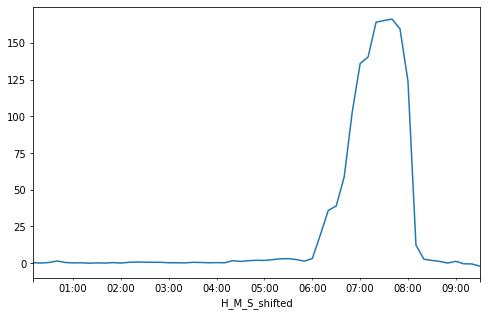

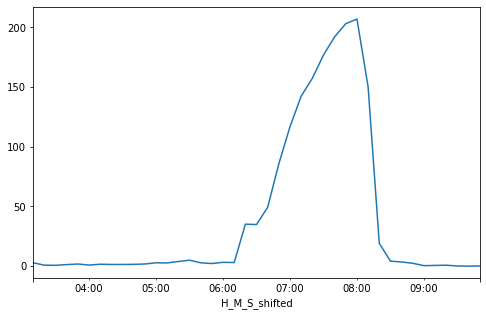

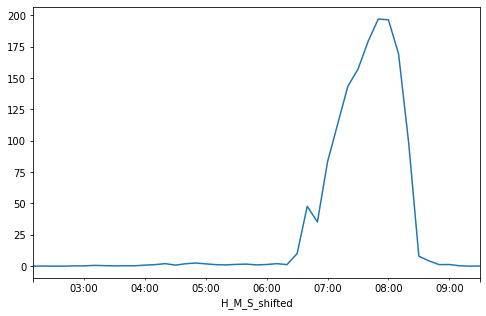

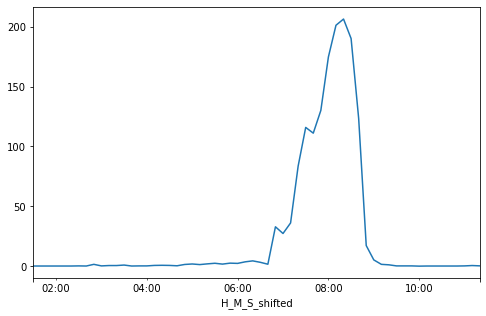

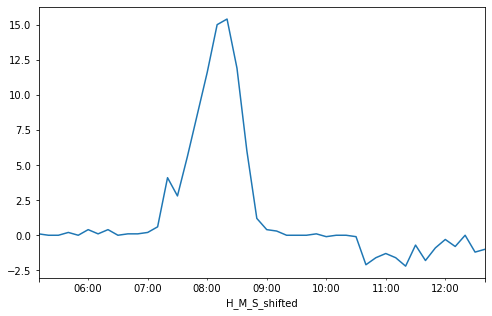

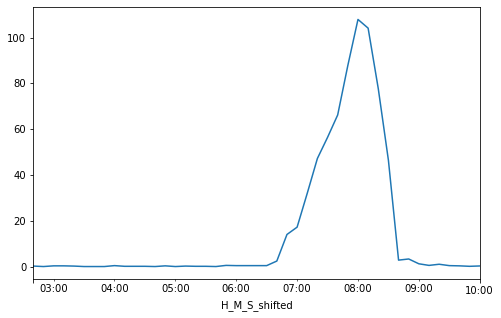

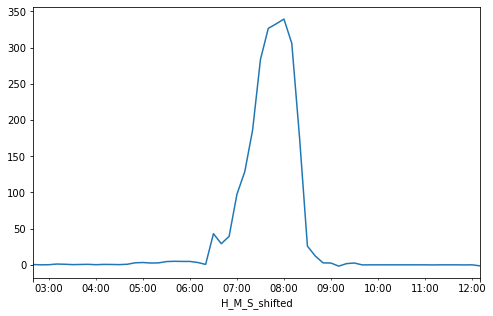

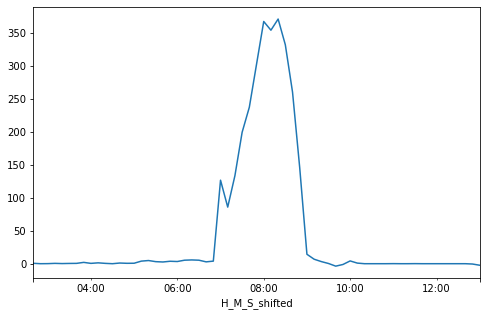

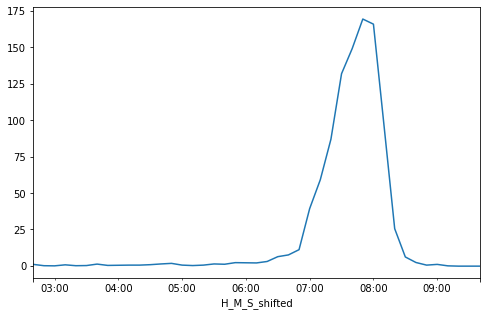

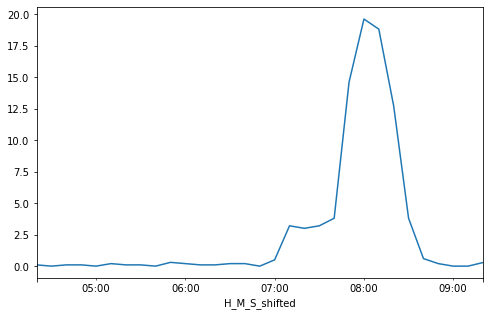

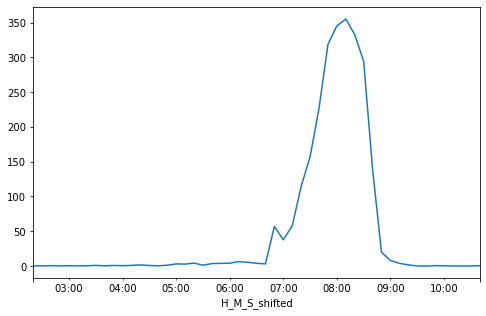

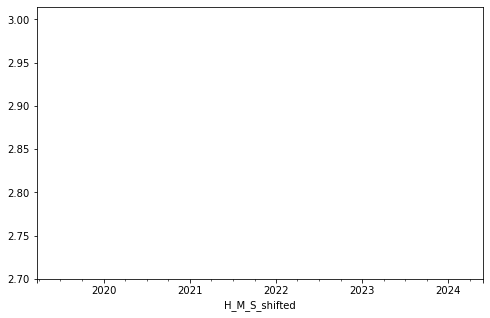

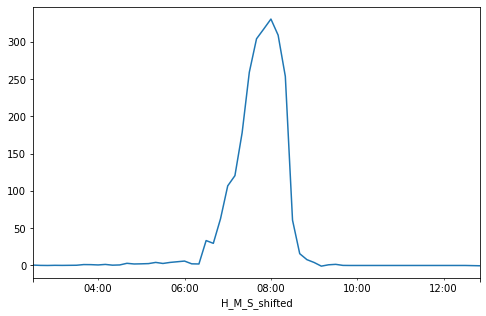

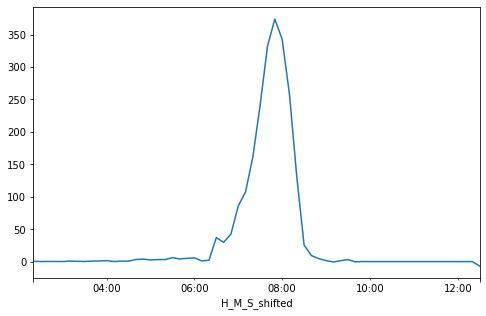

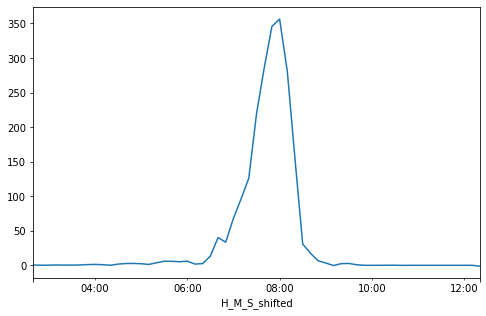

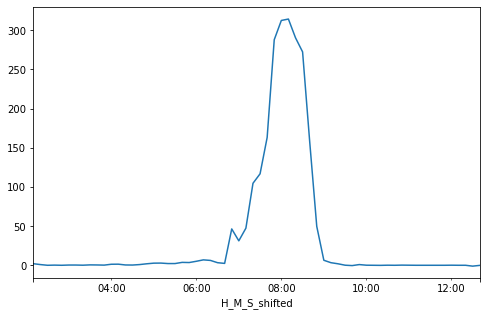

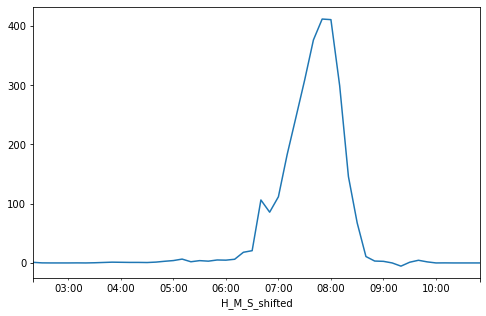

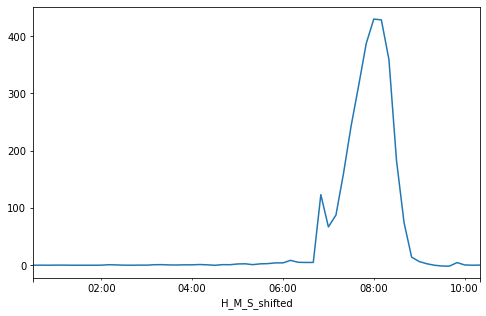

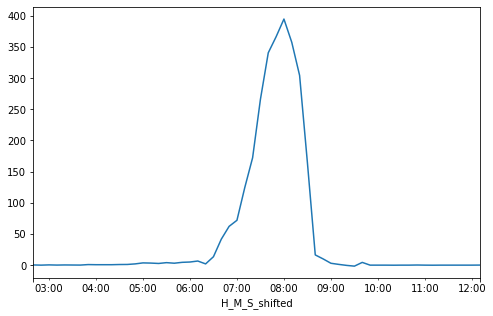

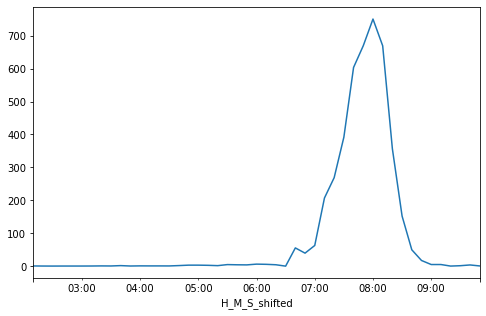

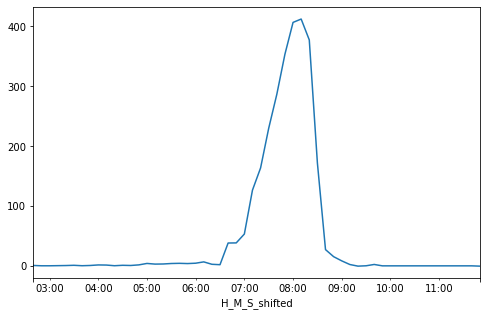

In [33]:
selection = df_etix_with_shifted_timestamps
list_game_id  = selection.gameid.unique()
list_game_id[list_game_id != 11]
list_game_id[list_game_id != 19]
list_game_id[list_game_id != 27]

for gid in list_game_id:
    print("gameid" + str(gid))
    plt.figure(figsize=(8,5))
    test = df_etix_with_shifted_timestamps.loc[df_etix_with_shifted_timestamps.gameid == gid]
    test.Result.resample('60s').sum().resample('10min').mean().plot()

<Figure size 432x288 with 0 Axes>

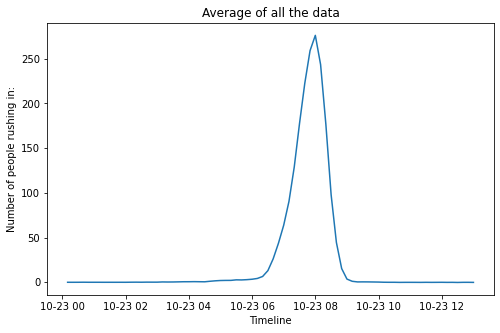

In [34]:
list_colors = ['r','g','b']
plt.figure()
#for gid in list_game_id:
#print("gameid" + str(gid))
plt.figure(figsize=(8,5))
test_sample = df_etix_with_shifted_timestamps#.loc[df_etix_with_shifted_timestamps.gameid == gid]
results = test_sample.Result.resample('60s').sum().resample('10min').mean()/len(list_game_id)
plt.title("Average of all the data")
plt.xlabel("Timeline")
plt.ylabel("Number of people rushing in:")
plt.plot(results.index, results)
plt.pause(0.5)
plt.show()

In [35]:
list_game_id

array([1, 2, 3, 4, 5, 8, 14, 15, 18, 19, 22, 24, 25, 27, 31, 32, 34, 36,
       38, 39, 40], dtype=object)

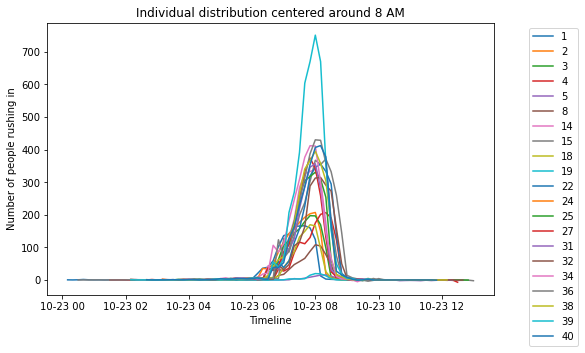

In [36]:
list_results_index = []
plt.figure(figsize=(8,5))
for gid in list_game_id:
#print("gameid" + str(gid))
    
    test_sample = df_etix_with_shifted_timestamps.loc[df_etix_with_shifted_timestamps.gameid == gid]
    results = test_sample.Result.resample('60s').sum().resample('10min').mean()
    plt.plot(results.index, results)
    #list_results_index.append([results.index, results])
plt.title("Individual distribution centered around 8 AM")
plt.xlabel("Timeline")
plt.ylabel("Number of people rushing in")
plt.legend(list_game_id, bbox_to_anchor=(1.2,1.0))
plt.show()

In [37]:
df_etix_with_shifted_timestamps

,ClientId,Serial,Mode,NewSection,OldSection,Result,ScannerId,Section,Row,Seat,Pricecode,PerformanceId,PackageId,ServerId,gameid,Date,Shifted_time_stamp,y_m_d,weather
H_M_S_shifted,,,,,,,,,,,,,,,,,,,
2021-10-23 00:14:38,16,100051312903,1,AK,outside,1,84,AK;G;M;ST;TV;IR;MANN;ORG;H;MED;VIP;A;E4;,0,0,999-(AK) Saison 2021/22,999999999,-1,9370,1,2021-08-14 12:34:38,2021-08-14 00:14:38,2021-08-14,dry
2021-10-23 00:14:59,16,100050992355,1,AK,outside,1,23,AK;G;M;ST;TV;IR;MANN;ORG;H;MED;VIP;A;E4;,0,0,999-(AK) Saison 2021/22,999999999,-1,9370,1,2021-08-14 12:34:59,2021-08-14 00:14:59,2021-08-14,dry
2021-10-23 00:23:47,16,100051070833,1,AK,outside,1,23,AK;G;M;ST;TV;IR;MANN;ORG;H;MED;VIP;A;E4;,0,0,999-(AK) Saison 2021/22,999999999,-1,9370,1,2021-08-14 12:43:47,2021-08-14 00:23:47,2021-08-14,dry
2021-10-23 00:28:09,16,100051065932,1,AK,outside,1,23,AK;G;M;ST;TV;IR;MANN;ORG;H;MED;VIP;A;E4;,0,0,999-(AK) Saison 2021/22,999999999,-1,9370,1,2021-08-14 12:48:09,2021-08-14 00:28:09,2021-08-14,dry
2021-10-23 00:28:49,16,100051065932,2,outside,AK,-1,23,AK;G;M;ST;TV;IR;MANN;ORG;H;MED;VIP;A;E4;,0,0,999-(AK) Saison 2021/22,999999999,-1,9370,1,2021-08-14 12:48:49,2021-08-14 00:28:49,2021-08-14,dry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-23 09:49:41,13,4945166874,1,Lene,outside,1,97,C1 Nichtraucher,4,15,Erwachsen,3039412,-1,6300,40,2019-08-31 14:09:41,2019-08-31 09:49:41,2019-08-31,dry
2021-10-23 09:49:43,13,4945166880,1,Lene,outside,1,97,C1 Nichtraucher,4,16,Kind,3039412,-1,6300,40,2019-08-31 14:09:43,2019-08-31 09:49:43,2019-08-31,dry
2021-10-23 09:49:45,13,4945166891,1,Lene,outside,1,97,C1 Nichtraucher,4,17,Kind,3039412,-1,6300,40,2019-08-31 14:09:45,2019-08-31 09:49:45,2019-08-31,dry


In [38]:
dry_games = df_etix_with_shifted_timestamps[df_etix_with_shifted_timestamps["weather"]=="dry"]

<Figure size 432x288 with 0 Axes>

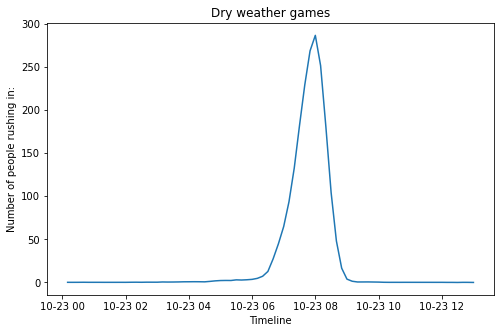

In [39]:
plt.figure()
#for gid in list_game_id:
#print("gameid" + str(gid))
plt.figure(figsize=(8,5))
test_sample_dry = dry_games#.loc[df_etix_with_shifted_timestamps.gameid == gid]
results_dry = test_sample_dry.Result.resample('60s').sum().resample('10min').mean()/dry_games.gameid.nunique()
plt.title("Dry weather games")
plt.xlabel("Timeline")
plt.ylabel("Number of people rushing in:")
plt.plot(results_dry.index, results_dry)
plt.pause(0.5)
plt.show()

<Figure size 432x288 with 0 Axes>

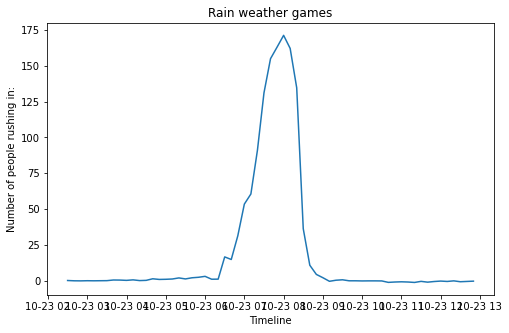

In [40]:
rain_games = df_etix_with_shifted_timestamps[df_etix_with_shifted_timestamps["weather"]=="rain"]
plt.figure()
#for gid in list_game_id:
#print("gameid" + str(gid))
plt.figure(figsize=(8,5))
test_sample_rain = rain_games#.loc[df_etix_with_shifted_timestamps.gameid == gid]
results_rain = test_sample_rain.Result.resample('60s').sum().resample('10min').mean()/rain_games.gameid.nunique()
plt.title("Rain weather games")
plt.xlabel("Timeline")
plt.ylabel("Number of people rushing in:")
plt.plot(results_rain.index, results_rain)
plt.pause(0.5)
plt.show()

In [41]:
rain_games.gameid.unique()

array([5, 25], dtype=object)

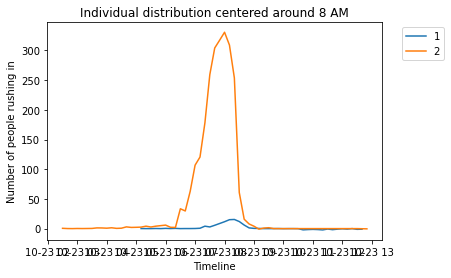

In [42]:
for gid in rain_games.gameid.unique():
#print("gameid" + str(gid))
    
    test_sample = rain_games.loc[rain_games.gameid == gid]
    results = test_sample.Result.resample('60s').sum().resample('10min').mean()
    plt.plot(results.index, results)
    #list_results_index.append([results.index, results])
plt.title("Individual distribution centered around 8 AM")
plt.xlabel("Timeline")
plt.ylabel("Number of people rushing in")
plt.legend(list_game_id, bbox_to_anchor=(1.2,1.0))
plt.show()

In [43]:
rain_games

,ClientId,Serial,Mode,NewSection,OldSection,Result,ScannerId,Section,Row,Seat,Pricecode,PerformanceId,PackageId,ServerId,gameid,Date,Shifted_time_stamp,y_m_d,weather
H_M_S_shifted,,,,,,,,,,,,,,,,,,,
2021-10-23 05:10:28,17,100043770424,1,Parking,outside,1,B96,PK;P1;,0,0,999-(PK) JK 2020/21,999999999,-1,8346,5,2020-10-31 10:20:28,2020-10-31 05:10:28,2020-10-31,rain
2021-10-23 05:41:11,17,100043959054,1,Parking,outside,1,B96,PK;P1;,0,0,999-(PK) JK 2020/21,999999999,-1,8346,5,2020-10-31 10:51:11,2020-10-31 05:41:11,2020-10-31,rain
2021-10-23 05:43:19,17,100043758701,1,Parking,outside,1,B96,PK;P1;,0,0,999-(PK) JK 2020/21,999999999,-1,8346,5,2020-10-31 10:53:19,2020-10-31 05:43:19,2020-10-31,rain
2021-10-23 06:05:58,17,100043768965,1,Parking,outside,1,B96,PK;P1;,0,0,999-(PK) JK 2020/21,999999999,-1,8346,5,2020-10-31 11:15:58,2020-10-31 06:05:58,2020-10-31,rain
2021-10-23 06:08:08,17,100045806549,1,Parking,outside,1,168,PK;P2;,0,0,999-(PK) JK 2020/21,999999999,-1,8346,5,2020-10-31 11:18:08,2020-10-31 06:08:08,2020-10-31,rain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-23 12:46:05,15,100031454917,2,outside,outside,0,166-2,AK;BMZ;L;E1E2;,0,0,999-(AK) JK 2019/20,999999999,-1,6496,25,2019-10-05 17:16:05,2019-10-05 12:46:05,2019-10-05,rain
2021-10-23 12:54:04,15,100027821941,2,outside,VIP,-1,166-2,AK;BMZ;L;E1E2;,0,0,999-(AK) JK 2019/20,999999999,-1,6496,25,2019-10-05 17:24:04,2019-10-05 12:54:04,2019-10-05,rain
2021-10-23 12:54:06,15,100027843556,2,outside,VIP,-1,166-2,AK;BMZ;L;E1E2;,0,0,999-(AK) JK 2019/20,999999999,-1,6496,25,2019-10-05 17:24:06,2019-10-05 12:54:06,2019-10-05,rain


In [44]:
df_etix_with_shifted_timestamps.reset_index(inplace=True)
df_etix_with_shifted_timestamps

,H_M_S_shifted,ClientId,Serial,Mode,NewSection,OldSection,Result,ScannerId,Section,Row,Seat,Pricecode,PerformanceId,PackageId,ServerId,gameid,Date,Shifted_time_stamp,y_m_d,weather
0,2021-10-23 00:14:38,16,100051312903,1,AK,outside,1,84,AK;G;M;ST;TV;IR;MANN;ORG;H;MED;VIP;A;E4;,0,0,999-(AK) Saison 2021/22,999999999,-1,9370,1,2021-08-14 12:34:38,2021-08-14 00:14:38,2021-08-14,dry
1,2021-10-23 00:14:59,16,100050992355,1,AK,outside,1,23,AK;G;M;ST;TV;IR;MANN;ORG;H;MED;VIP;A;E4;,0,0,999-(AK) Saison 2021/22,999999999,-1,9370,1,2021-08-14 12:34:59,2021-08-14 00:14:59,2021-08-14,dry
2,2021-10-23 00:23:47,16,100051070833,1,AK,outside,1,23,AK;G;M;ST;TV;IR;MANN;ORG;H;MED;VIP;A;E4;,0,0,999-(AK) Saison 2021/22,999999999,-1,9370,1,2021-08-14 12:43:47,2021-08-14 00:23:47,2021-08-14,dry
3,2021-10-23 00:28:09,16,100051065932,1,AK,outside,1,23,AK;G;M;ST;TV;IR;MANN;ORG;H;MED;VIP;A;E4;,0,0,999-(AK) Saison 2021/22,999999999,-1,9370,1,2021-08-14 12:48:09,2021-08-14 00:28:09,2021-08-14,dry
4,2021-10-23 00:28:49,16,100051065932,2,outside,AK,-1,23,AK;G;M;ST;TV;IR;MANN;ORG;H;MED;VIP;A;E4;,0,0,999-(AK) Saison 2021/22,999999999,-1,9370,1,2021-08-14 12:48:49,2021-08-14 00:28:49,2021-08-14,dry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412984,2021-10-23 09:49:41,13,4945166874,1,Lene,outside,1,97,C1 Nichtraucher,4,15,Erwachsen,3039412,-1,6300,40,2019-08-31 14:09:41,2019-08-31 09:49:41,2019-08-31,dry
412985,2021-10-23 09:49:43,13,4945166880,1,Lene,outside,1,97,C1 Nichtraucher,4,16,Kind,3039412,-1,6300,40,2019-08-31 14:09:43,2019-08-31 09:49:43,2019-08-31,dry
412986,2021-10-23 09:49:45,13,4945166891,1,Lene,outside,1,97,C1 Nichtraucher,4,17,Kind,3039412,-1,6300,40,2019-08-31 14:09:45,2019-08-31 09:49:45,2019-08-31,dry
412987,2021-10-23 11:01:48,15,100032824383,1,VIP,VIP,0,B117,AK;M;MT;P;VzP;,0,0,999-(AK) FC St. Pauli,999999999,-1,6300,40,2019-08-31 15:21:48,2019-08-31 11:01:48,2019-08-31,dry


In [45]:

df_etix_with_shifted_timestamps = df_etix_with_shifted_timestamps.set_index("Date")
df_etix_with_shifted_timestamps.index = pd.to_datetime(df_etix_with_shifted_timestamps.index)
weekend_games= df_etix_with_shifted_timestamps.loc[df_etix_with_shifted_timestamps.index.weekday >4]

In [46]:
df_etix_with_shifted_timestamps

,H_M_S_shifted,ClientId,Serial,Mode,NewSection,OldSection,Result,ScannerId,Section,Row,Seat,Pricecode,PerformanceId,PackageId,ServerId,gameid,Shifted_time_stamp,y_m_d,weather
Date,,,,,,,,,,,,,,,,,,,
2021-08-14 12:34:38,2021-10-23 00:14:38,16,100051312903,1,AK,outside,1,84,AK;G;M;ST;TV;IR;MANN;ORG;H;MED;VIP;A;E4;,0,0,999-(AK) Saison 2021/22,999999999,-1,9370,1,2021-08-14 00:14:38,2021-08-14,dry
2021-08-14 12:34:59,2021-10-23 00:14:59,16,100050992355,1,AK,outside,1,23,AK;G;M;ST;TV;IR;MANN;ORG;H;MED;VIP;A;E4;,0,0,999-(AK) Saison 2021/22,999999999,-1,9370,1,2021-08-14 00:14:59,2021-08-14,dry
2021-08-14 12:43:47,2021-10-23 00:23:47,16,100051070833,1,AK,outside,1,23,AK;G;M;ST;TV;IR;MANN;ORG;H;MED;VIP;A;E4;,0,0,999-(AK) Saison 2021/22,999999999,-1,9370,1,2021-08-14 00:23:47,2021-08-14,dry
2021-08-14 12:48:09,2021-10-23 00:28:09,16,100051065932,1,AK,outside,1,23,AK;G;M;ST;TV;IR;MANN;ORG;H;MED;VIP;A;E4;,0,0,999-(AK) Saison 2021/22,999999999,-1,9370,1,2021-08-14 00:28:09,2021-08-14,dry
2021-08-14 12:48:49,2021-10-23 00:28:49,16,100051065932,2,outside,AK,-1,23,AK;G;M;ST;TV;IR;MANN;ORG;H;MED;VIP;A;E4;,0,0,999-(AK) Saison 2021/22,999999999,-1,9370,1,2021-08-14 00:28:49,2021-08-14,dry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-31 14:09:41,2021-10-23 09:49:41,13,4945166874,1,Lene,outside,1,97,C1 Nichtraucher,4,15,Erwachsen,3039412,-1,6300,40,2019-08-31 09:49:41,2019-08-31,dry
2019-08-31 14:09:43,2021-10-23 09:49:43,13,4945166880,1,Lene,outside,1,97,C1 Nichtraucher,4,16,Kind,3039412,-1,6300,40,2019-08-31 09:49:43,2019-08-31,dry
2019-08-31 14:09:45,2021-10-23 09:49:45,13,4945166891,1,Lene,outside,1,97,C1 Nichtraucher,4,17,Kind,3039412,-1,6300,40,2019-08-31 09:49:45,2019-08-31,dry


<Figure size 432x288 with 0 Axes>

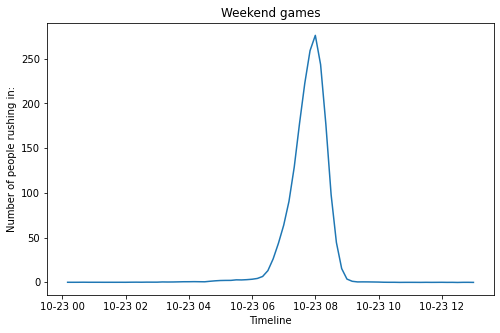

In [47]:
weekend_games = weekend_games.set_index("H_M_S_shifted")
plt.figure()
#for gid in list_game_id:
#print("gameid" + str(gid))
plt.figure(figsize=(8,5))
test_sample_weekend_games = weekend_games
results_weekend_games= test_sample_weekend_games.Result.resample('60s').sum().resample('10min').mean()/weekend_games.gameid.nunique()
plt.title("Weekend games")
plt.xlabel("Timeline")
plt.ylabel("Number of people rushing in:")
plt.plot(results_weekend_games.index, results_weekend_games)
plt.pause(0.5)
plt.show()

In [48]:
weekday_games= df_etix_with_shifted_timestamps.loc[df_etix_with_shifted_timestamps.index.weekday <4]

In [49]:
weekday_games

,H_M_S_shifted,ClientId,Serial,Mode,NewSection,OldSection,Result,ScannerId,Section,Row,Seat,Pricecode,PerformanceId,PackageId,ServerId,gameid,Shifted_time_stamp,y_m_d,weather
Date,,,,,,,,,,,,,,,,,,,
